# *Exploratory Data Analysis of Google Play Store Applications*

## Description of the data set



* **App**: Application name
* **Category**: Category the app belongs to
* **Rating**: Overall user rating of the app (as when scraped)
* **Reviews**: Number of user reviews for the app (as when scraped)
* **Size**: Size of the app (as when scraped)
* **Installs**: Number of user downloads/installs for the app (as when scraped)
* **Type**: Paid or Free
* **Price**: Price of the app (as when scraped)
* **Content Rating**: Age group the app is targeted at - Children / Mature 21+ / Adult
* **Genres**:An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* **Last UpdatedDate**: when the app was last updated on Play Store (as when scraped)
* **Current Ver**: Current version of the app available on Play Store (as when scraped)
* **Android Ver**: Min required Android version (as when scraped)


### Data Extraction
Let’s start by loading the required modules to start our experiment. I will be using numpy, pandas, seaborn and matplotlib.  Then we will read the google playstore apps dataset in a pandas DataFrame with read_csv() and check the contents with the .head() method.

In [1]:
#data extraction

#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#read googleplaystore.csv file
data=pd.read_csv('googleplaystore.csv',delimiter=',')

#converting into a dataframe
df=pd.DataFrame(data)



Before we go further, it is always good to have a look at the various columns and what kind of attributes are present in the data so that we could get a rough idea on how to begin with our EDA.

In [2]:
#print head of the data frame
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now based on the above result, we can classify the various data columns into numerical/categorical attributes:
* Numerical Attributes: Rating, Reviews, Size, Installs, Price
* Categorical Attributes: Category, Type, Content Rating, Genres

#### The next step is to determine the shape of the dataset (number of rows and columns)

In [3]:
#determining the number of rowns and columns of the dataset

print(df.shape)


(10840, 13)


#### RESULT: We observe that the data set has 10840 rows and 13 columns

####  Now, we determine the data type of each column

In [4]:
#determining data type of each column
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Data Cleaning and Manipulation

There are a few things we always need to check when it comes to data quality.
* **Missing Values:** There might be some missing values in the data. A good practice is to replace the missing values by median of the column or we could just drop these rows if they are not huge in number.
* **Outliers:** It is a good practice to remove outliers from your training data, as these tend to shift your model towards the wrong results.

* **Duplicate data:** We could also have information about the same application repeated in the data. We should remove all the duplicate data, as it could lead to overfitting if found in huge numbers.


#### We can drop the unnecessary columns

In [5]:
df = df.drop_duplicates(subset=['App'], keep = 'first')
print(df.shape)

(9659, 13)


In [6]:
#dropping the unnecessary columns
gps=df.drop(columns=['Last Updated','Current Ver', 'Android Ver'])
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


#### Checking for null values

In [7]:
#checking for null values in the dataframe
print(gps.isnull().sum())

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64


#### Filling the missing values with 'Null'

In [8]:
#filling the missing values with 0
gps_df=gps.fillna('null')
print(gps_df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64


#### As we can observe in STEP 3 the data type of Price, Installs, size and Ratings is object data type which should actually be of numeric data type. So by using to_numeric() we convert them to the respective data types 

In [9]:
#changing the data types
gps_df.Price = gps_df.Price.apply(lambda x: str(x).replace("$",""))
gps_df.Price = pd.to_numeric(gps_df.Price, errors='coerce')

gps_df.Installs = gps_df.Installs.apply(lambda x: str(x).replace("+",""))
gps_df.Installs = pd.to_numeric(gps_df.Installs, errors='coerce')

gps_df.Rating = pd.to_numeric(gps_df.Rating, errors='coerce')


gps_df.Size = gps_df.Size.apply(lambda x: str(x).replace("M",""))
gps_df.Size = pd.to_numeric(gps_df.Size, errors='coerce')

gps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

### Exploratory Data Analysis
##### It refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* When it comes to numerical attributes, we should start by observing various statistics like count, mean, standard deviation, etc. Let’s have a look at few of those for all our numerical categories.

* Descriptive or summary statistics in python (pandas) can be obtained by using describe function – describe(). 
* This function gives the count, mean, std and IQR values of the numeric columns





In [10]:
# descriptive statistics of the data set(numeric columns)
gps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8118.000000,1791.000000,9659.000000
mean,4.173243,2.165926e+05,21.166765,139.322725,1.099299
std,0.536625,1.831320e+06,21.883426,175.107047,16.852152
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,4.000000,2.500000e+01,5.100000,10.000000,0.000000
50%,4.300000,9.670000e+02,13.000000,100.000000,0.000000
75%,4.500000,2.940100e+04,29.000000,100.000000,0.000000
max,5.000000,7.815831e+07,100.000000,500.000000,400.000000


### Data Visualizations

### Bar plot representing top 10 Categories of Google play store Apps


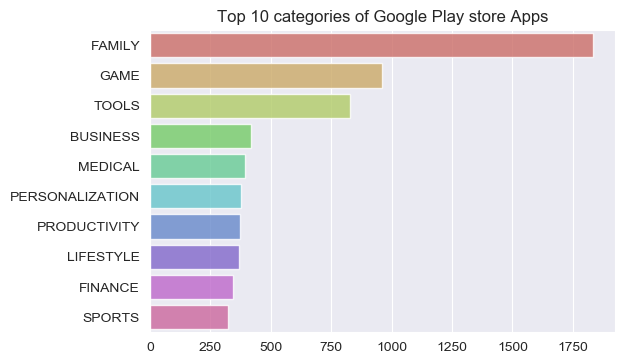

In [11]:
#barplot representing top 10 categories
sns.set_style('darkgrid')
mains=gps_df.Category.value_counts().head(10)
x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(x=x, y=y,palette="hls", alpha=0.8)

plt.title('Top 10 categories of Google Play store Apps')
plt.show()


### Pie Chart representing the ratio of content ratings of Google play store Apps

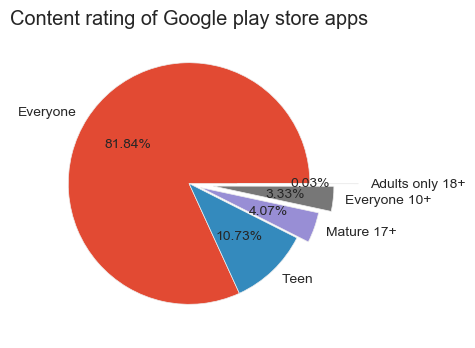

In [12]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 1, dpi=100)
explode = [0,0,.1,.2, .4]
gps_df['Content Rating'].value_counts().head(5).plot.pie(autopct='%0.2f%%',
                                        explode=explode)

plt.title('Content rating of Google play store apps')
plt.ylabel('')
plt.show()

#### RESULT: 82% of the apps in Google Play store can be installed by any person irrespective of the age

### Histogram representing the ratings of apps in Google play store

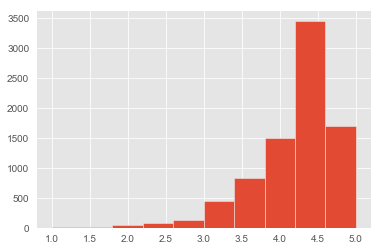

In [13]:
gps_df['Rating'].hist()

#### The data is skewed to the left. Nearly 3500 applications on google play store have a rating of 4.5 while  less than 800 applications have a rating less than or equal to 3.5

#### Encoding Categorical Data
* In the following data set the Type column is categorical as it has two categories ie., Free and Paid which has to be encoded. Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the replace() function in pandas. 


* We give a value of 0 to Free apps and 1 to paid apps


In [14]:
replace_map = {'Type': {'Free': 0, 'Paid': 1}}
gps_df.replace(replace_map, inplace=True)

a=gps_df.Type.value_counts()

### Histogram which represents the type of application(Free or Paid)

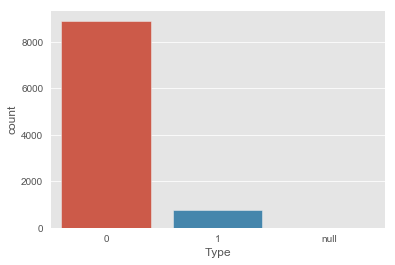

In [15]:
sns.countplot(gps_df['Type'])

#### RESULT: More than 90% of the applications in Google play store are available for free

### Bar plot representing the number of reviews for the top 10 Applications on google playstore

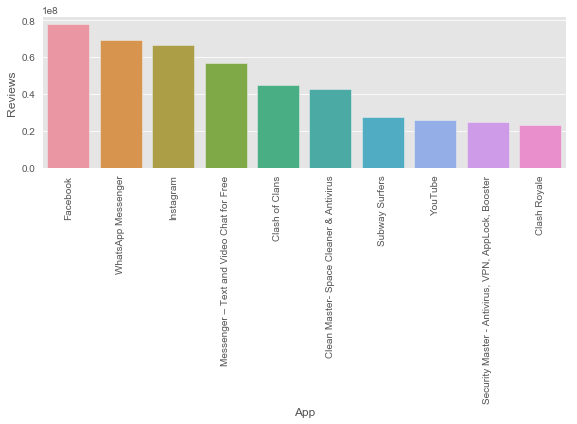

In [16]:
a = gps_df.sort_values(by=['Reviews'], ascending=False)
a.head()


plt.figure(figsize=(8,6))
fig = sns.barplot(x=a['App'][:10], y=a['Reviews'][:10])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)


### Heatmap to determine relationship between the attributes

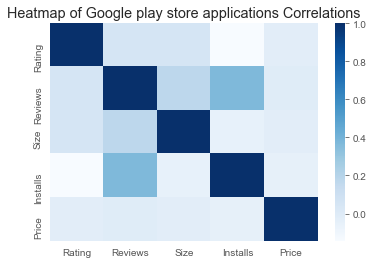

In [17]:

sns.heatmap(gps_df.corr(), cmap='Blues')

plt.title('Heatmap of Google play store applications Correlations')
plt.show()

### We can see that number of installations is related to the number of reviews of the application. Although this correlation is not high, we can say that the number of installations increases if there increase in the number of reviews